<a href="https://colab.research.google.com/github/simranbhurat/DM2-Project/blob/master/eda/Weekly_covid_cases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis: Category Hierarchy

## 1. Read DMC files

In [1]:
!git clone -l -s https://github.com/simranbhurat/DM2-Project.git

Cloning into 'DM2-Project'...
remote: Enumerating objects: 167, done.
remote: Counting objects: 100% (38/38), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 167 (delta 14), reused 33 (delta 12), pack-reused 129
Receiving objects: 100% (167/167), 48.86 MiB | 14.90 MiB/s, done.
Resolving deltas: 100% (61/61), done.


In [2]:
import pandas as pd


print('Orders Dataframe: \n')
orders = pd.read_csv('DM2-Project/src/data/orders.csv', sep='|')
print(orders.info(), '\n')
orders.head()

Orders Dataframe: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1071538 entries, 0 to 1071537
Data columns (total 4 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   date    1071538 non-null  object
 1   userID  1071538 non-null  int64 
 2   itemID  1071538 non-null  int64 
 3   order   1071538 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 32.7+ MB
None 



,date,userID,itemID,order
0,2020-06-01,38769,3477,1
1,2020-06-01,42535,30474,1
2,2020-06-01,42535,15833,1
3,2020-06-01,42535,20131,1
4,2020-06-01,42535,4325,1


In [3]:
print('Items Dataframe: \n')
items = pd.read_csv('DM2-Project/src/data/items.csv', sep='|')
print(items.info(), '\n')
print(items.describe(), '\n')
items.head()

Items Dataframe: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32776 entries, 0 to 32775
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   itemID      32776 non-null  int64 
 1   brand       32776 non-null  int64 
 2   feature_1   32776 non-null  int64 
 3   feature_2   32776 non-null  int64 
 4   feature_3   32776 non-null  int64 
 5   feature_4   32776 non-null  int64 
 6   feature_5   32776 non-null  int64 
 7   categories  25988 non-null  object
dtypes: int64(7), object(1)
memory usage: 2.0+ MB
None 

             itemID         brand     feature_1     feature_2     feature_3  \
count  32776.000000  32776.000000  32776.000000  32776.000000  32776.000000   
mean   16387.500000    702.776574      6.451062      0.817946    440.280388   
std     9461.760548    432.774074      2.744884      0.778284    132.566994   
min        0.000000     -1.000000     -1.000000      0.000000     -1.000000   
25%     8193.750000  

,itemID,brand,feature_1,feature_2,feature_3,feature_4,feature_5,categories
0,22665,861,4,0,490,2,66,"[2890, 855, 3908, 3909]"
1,28640,1366,10,1,537,0,101,NaN
2,13526,1090,10,0,511,0,0,"[3270, 163, 284, 1694, 12, 3837, 2422, 3595, 3..."
3,21399,1090,10,1,511,0,0,[3270]
4,8504,768,4,1,484,0,66,[2470]


In [4]:
print('Category Hierarchy Dataframe: \n')
hierarchy = pd.read_csv(
    'DM2-Project/src/data/category_hierarchy.csv', 
    sep='|'
)
print(hierarchy.info(), '\n')
hierarchy.head()

Category Hierarchy Dataframe: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4332 entries, 0 to 4331
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   category         4332 non-null   int64
 1   parent_category  4332 non-null   int64
dtypes: int64(2)
memory usage: 67.8 KB
None 



,category,parent_category
0,0,75
1,1,1499
2,2,1082
3,3,3498
4,4,1623


## 2. Hierarchical Levels

In [5]:
hierarchy['level'] = 0

root_index = hierarchy[hierarchy['category']==hierarchy['parent_category']].index
hierarchy.loc[root_index, 'level'] = 1
root_categories = list(hierarchy.loc[root_index, 'category'])

level_1_index = hierarchy.query(
    'parent_category in @root_categories and category not in @root_categories'
).index

level_index = level_1_index

for level in range(1, 14):
    hierarchy.loc[level_index, 'level'] = level + 1
    level_categories = list(hierarchy[hierarchy['level']==level+1]['category'])
    next_level_index = hierarchy.query(
        'parent_category in @level_categories and category not in @level_categories'
    ).index
    level_index = next_level_index

level_0_index = hierarchy[hierarchy['level']==0]['category'].index
hierarchy.drop(index=level_0_index, inplace=True)

hierarchy.sort_values(by='level').head(10)

,category,parent_category,level
3930,3898,3898,1
4331,4299,3898,2
4035,4003,3898,2
384,381,3898,2
4036,4004,3898,2
4037,4005,3898,2
4038,4006,3898,2
2887,2863,3898,2
4039,4007,3898,2
4040,4008,3898,2


level
1       1
2     485
3     668
4    1949
5     865
6     234
7      78
8       9
9      22
Name: category, dtype: int64


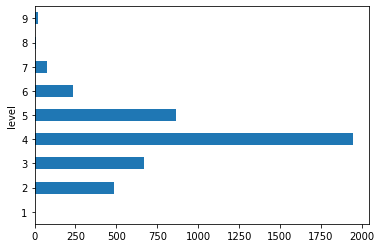

In [6]:
print(hierarchy.groupby(['level'])['category'].count())
hierarchy.groupby(['level'])['category'].count().plot(kind='barh')

In [7]:
hierarchy.describe()

,category,parent_category,level
count,4311.000000,4311.000000,4311.000000
mean,2148.108559,2205.317328,4.016701
std,1241.497665,1222.949943,1.161325
min,0.000000,8.000000,1.000000
25%,1071.500000,1147.000000,3.000000
50%,2148.000000,2284.000000,4.000000
75%,3222.500000,3329.000000,5.000000
max,4299.000000,3898.000000,9.000000


## 3. Level 2 category of each leaf

In [8]:
def get_parent_level_k_from(category, k=2):
    current_level = hierarchy[hierarchy['category']==category]['level'].values[0]
    
    parent = hierarchy[hierarchy['category']==category]['parent_category'].values[0]

    if current_level <=2:
        return category
    
    elif current_level==3:
        return parent
    
    else:
        current_level -= 1

        while current_level > k:
            next_parent = hierarchy[hierarchy['category']==parent]['parent_category'].values[0]
            current_level -= 1
            parent = next_parent
        
        return parent

get_parent_level_k_from(3325)

3624

In [9]:
hierarchy['level_2_category'] = hierarchy['category'].apply(get_parent_level_k_from)
hierarchy['level_2_category'].nunique()

486

## 4. Visualize tree

In [10]:
import networkx as nx
import matplotlib.pyplot as plt

hierarchy_graph = nx.from_pandas_edgelist(
    df=hierarchy,
    source='category',
    target='parent_category'
)

hubs, authorities = nx.hits(hierarchy_graph, normalized=False)

max_authority = sorted(list(authorities.values()), reverse=True)[0]
max_authority

0.713745159124934

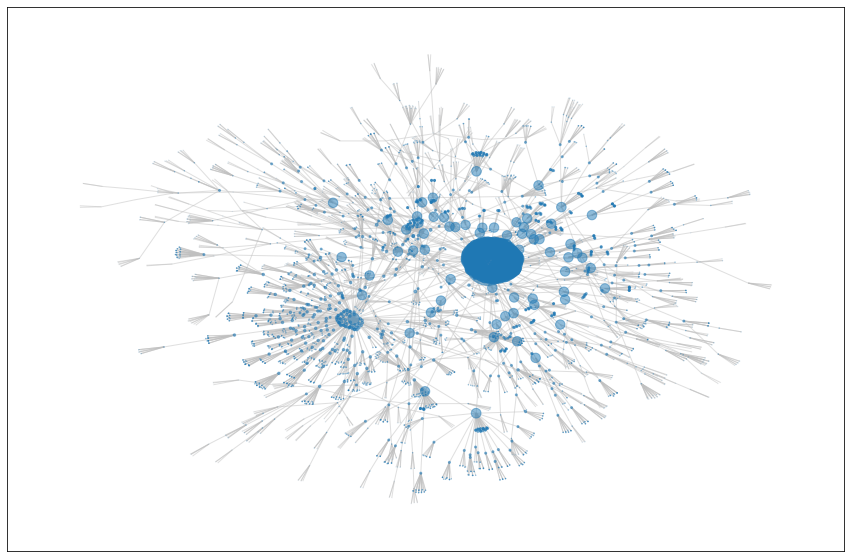

In [11]:
nodelist = list(authorities.keys())
node_size = [value * 2000 / max_authority for value in authorities.values()]

nx.draw_networkx(
    hierarchy_graph, 
    with_labels=False, 
    alpha=0.5,
    nodelist=nodelist, 
    node_size=node_size,
    edge_color="silver",
)
fig = plt.gcf()
fig.set_size_inches(15 , 10)
plt.show()

In [12]:
authorities_df = pd.DataFrame(
    [{'node': k, 'authority': v} for k, v in authorities.items()]
)

authorities_df.sort_values(by='authority', ascending=False).head(10)

,node,authority
68,3898,0.713745
17,2364,0.048166
319,2231,0.033986
103,1666,0.033337
198,600,0.033199
846,2346,0.032666
308,1062,0.032598
195,3624,0.032595
72,678,0.032536
696,1480,0.032531


In [13]:
processed_hierarchy = pd.merge(
    hierarchy, 
    authorities_df, 
    how='left', 
    left_on='category', 
    right_on='node',
).drop(columns=['node'])

processed_hierarchy.head()

,category,parent_category,level,level_2_category,authority
0,0,75,4,2364,0.000096
1,1,1499,5,2723,0.000003
2,2,1082,4,2231,0.000068
3,3,3498,4,2364,0.000097
4,4,1623,4,1825,0.000066


## 5. Items Category reduction

2     6877
0     6788
1     6564
3     4447
4     2696
5     1689
6     1220
7      863
8      555
9      308
10     246
11     166
12     116
13      83
14      50
15      34
16      22
17      14
18       7
20       7
19       6
21       5
22       5
33       2
23       2
25       1
29       1
35       1
24       1
Name: categories, dtype: int64


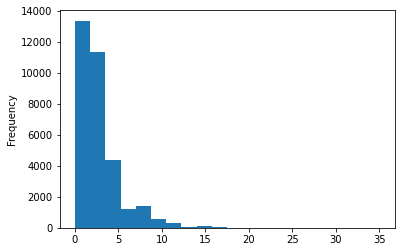

In [14]:
print(items['categories'].apply(lambda x: len(eval(x)) if isinstance(x, str) else 0).value_counts())
items['categories'].apply(
    lambda x: len(eval(x)) if isinstance(x, str) else 0
).plot(kind='hist', bins=20)

2     8313
1     7903
0     6788
3     4434
4     2092
5     1200
6      809
7      579
8      311
9      160
10      97
11      37
12      24
13      16
15       5
14       3
18       3
19       1
16       1
Name: categories_level_2, dtype: int64


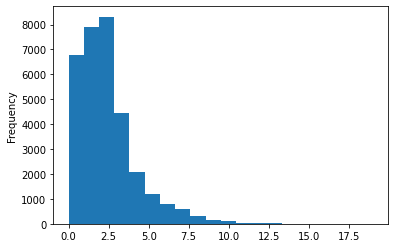

In [15]:
def get_item_categories_level_2(item_categories_string):
    if isinstance(item_categories_string, str):
        item_categories_list = eval(item_categories_string)
        level_2_categories = set()
        for category in item_categories_list:
            level_2_category = processed_hierarchy[
                processed_hierarchy['category']==category
            ]['level_2_category'].values[0]
            level_2_categories.add(level_2_category)
        return str(list(level_2_categories))

items['categories_level_2'] = items['categories'].apply(get_item_categories_level_2)
print(items['categories_level_2'].apply(lambda x: len(eval(x)) if isinstance(x, str) else 0).value_counts())
items['categories_level_2'].apply(lambda x: len(eval(x)) if isinstance(x, str) else 0).plot(kind='hist', bins=20)

## 6. Items Categories sparse matrix

In [16]:
item_category_matrix = items[['itemID', 'categories_level_2']]
for level_2_category in processed_hierarchy['level_2_category'].unique():
    item_category_matrix[f'category_{level_2_category}'] = item_category_matrix['categories_level_2'].apply(
        lambda x: level_2_category in eval(x) if isinstance(x, str) else False
    ) * 1

item_category_matrix.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  """


(32776, 488)

In [17]:
item_category_matrix.head()

,itemID,categories_level_2,category_2364,category_2723,category_2231,category_1825,category_1840,category_2346,category_34,category_600,...,category_4290,category_4291,category_4292,category_4293,category_4294,category_4295,category_4296,category_4297,category_4298,category_4299
0,22665,"[2012, 3909, 2838, 3908]",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,28640,None,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,13526,"[3912, 3913, 3914, 3915, 3860, 600, 2364]",1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,21399,[2364],1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8504,[1072],0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 7. Sales per category

In [18]:
orders['date'] = pd.to_datetime(orders['date'])
orders['week'] = orders['date'] - pd.to_timedelta(
    orders['date'].dt.dayofweek, 
    unit='d'
)

item_sales_per_week = orders.groupby(by=['week', 'itemID'])['order'].sum().reset_index()
item_sales_per_week.sample(10)

,week,itemID,order
220495,2020-11-30,5382,1
241001,2020-12-14,11628,6
287826,2021-01-18,20142,4
166367,2020-10-12,23152,1
104707,2020-08-24,9737,1
40088,2020-06-29,22471,2
183868,2020-10-26,28279,2
80677,2020-08-03,16784,2
103888,2020-08-24,6817,1
68150,2020-07-20,32255,3


In [19]:
order_categories = pd.merge(
    item_sales_per_week,
    item_category_matrix,
    how='inner',
    on='itemID'
)

order_categories.sample(5)

,week,itemID,order,categories_level_2,category_2364,category_2723,category_2231,category_1825,category_1840,category_2346,...,category_4290,category_4291,category_4292,category_4293,category_4294,category_4295,category_4296,category_4297,category_4298,category_4299
16587,2020-07-06,3090,4,[686],0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
57902,2020-11-02,10308,1,"[857, 1559]",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
160384,2021-01-25,28503,1,"[3914, 3915, 1072, 370, 2364]",1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
232294,2020-08-17,30035,3,"[336, 1825, 1677, 366]",0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
285244,2020-08-24,28229,1,[2793],0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
for column in order_categories.columns:
    if column.startswith('category_'):
        order_categories[column] = order_categories[column] * order_categories['order']

order_categories.sample(5)

,week,itemID,order,categories_level_2,category_2364,category_2723,category_2231,category_1825,category_1840,category_2346,...,category_4290,category_4291,category_4292,category_4293,category_4294,category_4295,category_4296,category_4297,category_4298,category_4299
54718,2020-12-28,9730,7,"[3907, 4133, 4071, 3917, 3056, 1682, 4213, 421...",7,0,7,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96801,2020-08-24,17426,2,"[2231, 252, 519]",0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50859,2020-08-24,8993,1,"[252, 519]",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
260566,2020-11-16,12146,1,None,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60640,2021-01-25,10869,4,"[252, 519]",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
order_categories.sample(10)

,week,itemID,order,categories_level_2,category_2364,category_2723,category_2231,category_1825,category_1840,category_2346,...,category_4290,category_4291,category_4292,category_4293,category_4294,category_4295,category_4296,category_4297,category_4298,category_4299
41290,2020-09-14,7330,16,"[2793, 3915]",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
102175,2021-01-18,18364,5,"[3937, 1543, 1480, 2793, 2346, 519, 4113, 1682...",0,0,0,0,0,5,...,0,0,0,0,0,0,0,0,0,0
201079,2020-08-31,17599,1,"[275, 965]",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50374,2020-06-08,8921,2,"[1072, 2793, 621]",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
218062,2021-01-25,5968,2,"[2920, 1072, 3915]",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
138875,2020-07-06,24641,3,"[2917, 1735]",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
62425,2020-06-15,11118,2,[2006],0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
110014,2021-01-04,19612,1,[3189],0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
198657,2020-11-02,15051,1,"[432, 1677]",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
219981,2020-11-02,9452,1,"[3616, 2364, 2006]",1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##Covid

In [22]:
order_categories1 = order_categories.drop(
    columns=['itemID', 'order', 'categories_level_2']
).groupby('week').sum()

order_categories1.head()

,category_2364,category_2723,category_2231,category_1825,category_1840,category_2346,category_34,category_600,category_678,category_432,...,category_4290,category_4291,category_4292,category_4293,category_4294,category_4295,category_4296,category_4297,category_4298,category_4299
week,,,,,,,,,,,,,,,,,,,,,
2020-06-01,16921,2143,10585,1309,5168,4779,1501,928,1174,515,...,14,0,0,0,0,0,0,0,0,0
2020-06-08,11507,1317,7400,959,3415,3228,986,550,762,277,...,4,0,0,0,0,0,1,0,0,0
2020-06-15,13834,1599,9393,1233,4201,3962,1259,663,969,305,...,11,0,0,0,0,0,0,0,0,0
2020-06-22,14845,1776,9605,1404,4466,4548,1286,712,940,385,...,20,0,0,1,0,0,1,0,1,0
2020-06-29,16475,1855,10581,1543,5173,5269,1478,808,955,333,...,23,0,1,1,0,0,0,0,1,0


In [23]:
# normalise order categories
normalised_order_categories=(order_categories1-order_categories1.min())/(order_categories1.max()-order_categories1.min())
normalised_order_categories.head()

,category_2364,category_2723,category_2231,category_1825,category_1840,category_2346,category_34,category_600,category_678,category_432,...,category_4290,category_4291,category_4292,category_4293,category_4294,category_4295,category_4296,category_4297,category_4298,category_4299
week,,,,,,,,,,,,,,,,,,,,,
2020-06-01,0.880937,0.838370,0.884563,0.701691,0.852990,0.481378,0.776730,0.435484,1.000000,0.573930,...,0.354839,NaN,0.000000,0.000000,0.0,NaN,0.0,NaN,0.000000,0.0
2020-06-08,0.282969,0.257906,0.345464,0.278986,0.267290,0.000000,0.236897,0.000000,0.474490,0.110895,...,0.032258,NaN,0.000000,0.000000,0.0,NaN,1.0,NaN,0.000000,0.0
2020-06-15,0.539982,0.456079,0.682803,0.609903,0.529903,0.227809,0.523061,0.130184,0.738520,0.165370,...,0.258065,NaN,0.000000,0.000000,0.0,NaN,0.0,NaN,0.000000,0.0
2020-06-22,0.651646,0.580464,0.718687,0.816425,0.618443,0.409683,0.551363,0.186636,0.701531,0.321012,...,0.548387,NaN,0.000000,0.333333,0.0,NaN,1.0,NaN,0.333333,0.0
2020-06-29,0.831677,0.635980,0.883886,0.984300,0.854661,0.633457,0.752621,0.297235,0.720663,0.219844,...,0.645161,NaN,0.142857,0.333333,0.0,NaN,0.0,NaN,0.333333,0.0


In [24]:
# reset index
order_categories1 = order_categories1.reset_index()

In [25]:
import numpy as np
import pandas as pd

In [26]:
# Most ordered categories
s = order_categories1.sum()
s.nlargest(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


category_2364    502125
category_3915    377370
category_2793    319412
category_3624    319185
category_2231    313087
dtype: int64

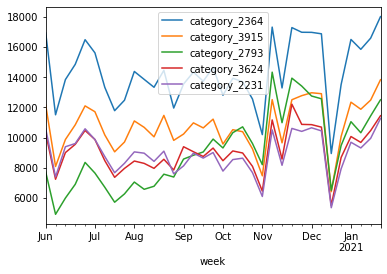

In [27]:
order_categories1.plot(x='week', y=['category_2364', 'category_3915', 'category_2793', 'category_3624', 'category_2231'])

In [28]:
# weekly covid cases
covid = pd.read_csv('DM2-Project/src/data/weekly-covid-cases.csv').rename(columns={"Day" : "date", "Entity": "country", "Weekly cases": "weekly_cases"})
covid["date"]= pd.to_datetime(covid["date"])
covid['week'] = covid['date'] - pd.to_timedelta(
    covid['date'].dt.dayofweek, 
    unit='d'
)
covid = covid.drop(columns=['Code'])
covid = covid.drop(covid[covid.country!='Germany'].index)

In [29]:
# weekly covid cases
covid_w = covid.drop(columns=['date']).groupby(by=['week'])['weekly_cases'].sum().reset_index()

# drop data before 2020-06-01	and after 2021-01-25
covid_w = covid_w.drop(covid_w[(covid_w['week'] < '2020-06-01') | (covid_w['week'] > '2021-02-28')].index)

covid_w.head()
#covid_w.plot(x='week', y='weekly_cases')

,week,weekly_cases
18,2020-06-01,20116
19,2020-06-08,17073
20,2020-06-15,18761
21,2020-06-22,28308
22,2020-06-29,22031


In [30]:
normalised_covid_w = covid_w
normalised_covid_w['weekly_cases']=(normalised_covid_w['weekly_cases']-normalised_covid_w['weekly_cases'].min())/(normalised_covid_w['weekly_cases'].max()-normalised_covid_w['weekly_cases'].min())
normalised_covid_w.head()

,week,weekly_cases
18,2020-06-01,0.002607
19,2020-06-08,0.000000
20,2020-06-15,0.001446
21,2020-06-22,0.009625
22,2020-06-29,0.004248


In [31]:
# merge order-categories with covid
occ = normalised_order_categories.merge(normalised_covid_w, on= 'week', how='left')
occ.head()

,week,category_2364,category_2723,category_2231,category_1825,category_1840,category_2346,category_34,category_600,category_678,...,category_4291,category_4292,category_4293,category_4294,category_4295,category_4296,category_4297,category_4298,category_4299,weekly_cases
0,2020-06-01,0.880937,0.838370,0.884563,0.701691,0.852990,0.481378,0.776730,0.435484,1.000000,...,NaN,0.000000,0.000000,0.0,NaN,0.0,NaN,0.000000,0.0,0.002607
1,2020-06-08,0.282969,0.257906,0.345464,0.278986,0.267290,0.000000,0.236897,0.000000,0.474490,...,NaN,0.000000,0.000000,0.0,NaN,1.0,NaN,0.000000,0.0,0.000000
2,2020-06-15,0.539982,0.456079,0.682803,0.609903,0.529903,0.227809,0.523061,0.130184,0.738520,...,NaN,0.000000,0.000000,0.0,NaN,0.0,NaN,0.000000,0.0,0.001446
3,2020-06-22,0.651646,0.580464,0.718687,0.816425,0.618443,0.409683,0.551363,0.186636,0.701531,...,NaN,0.000000,0.333333,0.0,NaN,1.0,NaN,0.333333,0.0,0.009625
4,2020-06-29,0.831677,0.635980,0.883886,0.984300,0.854661,0.633457,0.752621,0.297235,0.720663,...,NaN,0.142857,0.333333,0.0,NaN,0.0,NaN,0.333333,0.0,0.004248


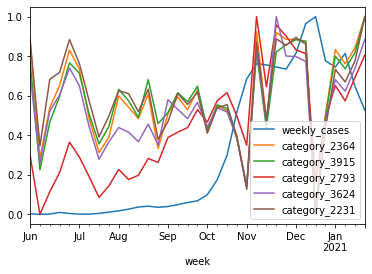

In [32]:
# plot most ordered categories vs. covid cases
occ.plot(x='week', y=['weekly_cases', 'category_2364', 'category_3915', 'category_2793', 'category_3624', 'category_2231'])

In [33]:
correlation = occ.corr()
correlation = correlation.weekly_cases.reset_index().sort_values(by='weekly_cases', ascending=False)
correlation = correlation.drop(correlation[(correlation['weekly_cases'] == 1)].index)

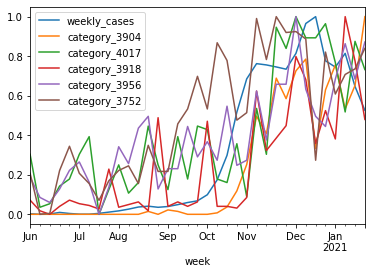

In [34]:
# plot most correlated categories vs. covid cases
occ.plot(x='week', y=['weekly_cases', 'category_3904', 'category_4017', 'category_3918', 'category_3956', 'category_3752'])

In [35]:
# number of categories with correlation greater than 0.6
len(correlation[correlation['weekly_cases'] >= 0.6])

24

In [36]:
correlation['category'] = correlation['index'].apply(lambda x: x.split('_')[1])

In [37]:
def get_correlation(category):
    return correlation[correlation['category']==str(category)]['weekly_cases'].values[0]

def get_max_correlation(category_list_str):
    if isinstance(category_list_str, str):
        category_list = eval(category_list_str)
        if isinstance(category_list, list):
            category_list = eval(category_list_str)
            corr_list = [get_correlation(category) for category in category_list]
            
            return max(corr_list)
        else:
            return 0.0
    else:
        return 0.0

items['covid_category_correlation'] = items['categories_level_2'].apply(get_max_correlation)
items.head()

,itemID,brand,feature_1,feature_2,feature_3,feature_4,feature_5,categories,categories_level_2,covid_category_correlation
0,22665,861,4,0,490,2,66,"[2890, 855, 3908, 3909]","[2012, 3909, 2838, 3908]",0.512895
1,28640,1366,10,1,537,0,101,NaN,None,0.000000
2,13526,1090,10,0,511,0,0,"[3270, 163, 284, 1694, 12, 3837, 2422, 3595, 3...","[3912, 3913, 3914, 3915, 3860, 600, 2364]",0.642778
3,21399,1090,10,1,511,0,0,[3270],[2364],0.219989
4,8504,768,4,1,484,0,66,[2470],[1072],0.529130


In [38]:
items[['itemID', 'covid_category_correlation']]

,itemID,covid_category_correlation
0,22665,0.512895
1,28640,0.000000
2,13526,0.642778
3,21399,0.219989
4,8504,0.529130
...,...,...
32771,12036,0.642778
32772,22709,0.687012
32773,32322,0.682554
32774,19118,0.559565


In [39]:
normalised_covid_w['month'] = normalised_covid_w['week'].dt.month
normalised_covid_m = normalised_covid_w.groupby('month')[['weekly_cases']].mean()

for month in normalised_covid_m.index:
    items[f'covid_effect_month_{month}'] = items['covid_category_correlation'] * normalised_covid_m['weekly_cases'][month]

items.head()

,itemID,brand,feature_1,feature_2,feature_3,feature_4,feature_5,categories,categories_level_2,covid_category_correlation,covid_effect_month_1,covid_effect_month_2,covid_effect_month_6,covid_effect_month_7,covid_effect_month_8,covid_effect_month_9,covid_effect_month_10,covid_effect_month_11,covid_effect_month_12
0,22665,861,4,0,490,2,66,"[2890, 855, 3908, 3909]","[2012, 3909, 2838, 3908]",0.512895,0.350296,0.174907,0.001839,0.002250,0.016117,0.027726,0.139644,0.377793,0.455986
1,28640,1366,10,1,537,0,101,NaN,None,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,13526,1090,10,0,511,0,0,"[3270, 163, 284, 1694, 12, 3837, 2422, 3595, 3...","[3912, 3913, 3914, 3915, 3860, 600, 2364]",0.642778,0.439004,0.219199,0.002305,0.002819,0.020198,0.034747,0.175007,0.473464,0.571458
3,21399,1090,10,1,511,0,0,[3270],[2364],0.219989,0.150248,0.075020,0.000789,0.000965,0.006913,0.011892,0.059896,0.162042,0.195580
4,8504,768,4,1,484,0,66,[2470],[1072],0.529130,0.361385,0.180443,0.001897,0.002321,0.016627,0.028603,0.144065,0.389752,0.470420


In [40]:
items[[
    'itemID', 
    'covid_category_correlation',
    'covid_effect_month_6',
    'covid_effect_month_7',
    'covid_effect_month_8',
    'covid_effect_month_9',
    'covid_effect_month_10',
    'covid_effect_month_11',
    'covid_effect_month_12',
    'covid_effect_month_1',
    'covid_effect_month_2',
]].to_csv(
    'item_covid_correlation.csv', 
    sep='|', 
    index=False,
)